# 📁 Generar csv

In [66]:
import pandas as pd
import numpy as np
import random
import seaborn as sns  
import matplotlib.pyplot as plt

## semilla para reprodicibilidad

In [51]:
np.random.seed(42)
random.seed(42)

## Parametros base

In [52]:
n = 1500
paises_destino = ['Reino Unido', 'Canada', 'Estados Unidos', 'Australia', 'Malta']
idiomas = ['Inglés', 'Francés', 'Alemán', 'Italiano']
alojamientos = ['Familia anfitriona', 'Residencia estudiantil', 'Apartamento compartido', 'Hotel', 'Hostal']

## Generar datos

In [53]:
data = {
    'estudiante_id' : range(1, n + 1),
    'pais_destino' : np.random.choice(paises_destino, size=n),
    'idioma_estudiado' : np.random.choice(idiomas, size=n),
    'edad' : np.random.randint(16, 45, size=n),
    'duracion_semanas' : np.random.randint(1, 25, size=n),
    'alojamiento' : np.random.choice(alojamientos, size=n),
}

## Sastifaccion (entre 1 y 5)

In [54]:
data['satisfaccion'] = np.random.choice([1, 2, 3, 4, 5], size=n, p=[0.05, 0.1, 0.2, 0.4, 0.25])

## Quejas reportadas

In [55]:
data['quejas_reportadas'] = [
    np.random.poisson(0.5) if s >= 4 else np.random.poisson(2.5)
    for s in data['satisfaccion']
]

## Recomendaria EF


In [56]:
data['recomendaria_EF'] = [
    1 if s >= 4 else 0
    for s in data['satisfaccion']
]

## Crear DataFrame

In [57]:
df_sastifaccion = pd.DataFrame(data)

## Guardar CSV

In [58]:
df_sastifaccion.to_csv('datos_satisfaccion_estudiantes.csv', index=False)

In [59]:
df_sastifaccion.head()

,estudiante_id,pais_destino,idioma_estudiado,edad,duracion_semanas,alojamiento,satisfaccion,quejas_reportadas,recomendaria_EF
0,1,Australia,Italiano,43,15,Residencia estudiantil,2,1,0
1,2,Malta,Italiano,43,9,Residencia estudiantil,3,2,0
2,3,Estados Unidos,Francés,34,14,Familia anfitriona,5,0,1
3,4,Malta,Italiano,32,18,Hotel,4,0,1
4,5,Malta,Alemán,29,17,Familia anfitriona,4,0,1


## 🔍 ANALISIS EXPIATORIOS

## ¿QUE TIPO DE ALOJAMIENTO TIENE MEJORES NIVELES DE SASTIFACCION?🏠

In [60]:
df_sastifaccion.groupby('alojamiento')['satisfaccion'].mean().sort_values(ascending=False)

alojamiento
Familia anfitriona        3.773973
Residencia estudiantil    3.766773
Apartamento compartido    3.673469
Hostal                    3.668874
Hotel                     3.602007
Name: satisfaccion, dtype: float64

## ¿Que pais destino tiene mas quejas? 📉


In [61]:
df_sastifaccion.groupby('pais_destino')['quejas_reportadas'].mean().sort_values(ascending=False)

pais_destino
Estados Unidos    1.436860
Australia         1.101399
Reino Unido       1.072785
Canada            1.061224
Malta             1.019293
Name: quejas_reportadas, dtype: float64

## ¿Existe relacion entre duracion del curso y de sastifaccion del cliente? 📊


In [69]:
duracion_semanas = df_sastifaccion.groupby('duracion_semanas')['satisfaccion'].mean().sort_values(ascending=False)
duracion_semanas

duracion_semanas
19    4.031746
5     3.892857
9     3.872727
17    3.864198
3     3.828125
4     3.816667
21    3.813559
2     3.792453
7     3.791667
16    3.757576
14    3.750000
22    3.710526
18    3.704918
11    3.693548
13    3.671642
8     3.671429
6     3.666667
20    3.602941
23    3.602740
15    3.585714
1     3.446429
12    3.403846
24    3.387097
10    3.380952
Name: satisfaccion, dtype: float64

## ¿Tiene que ver la edad?

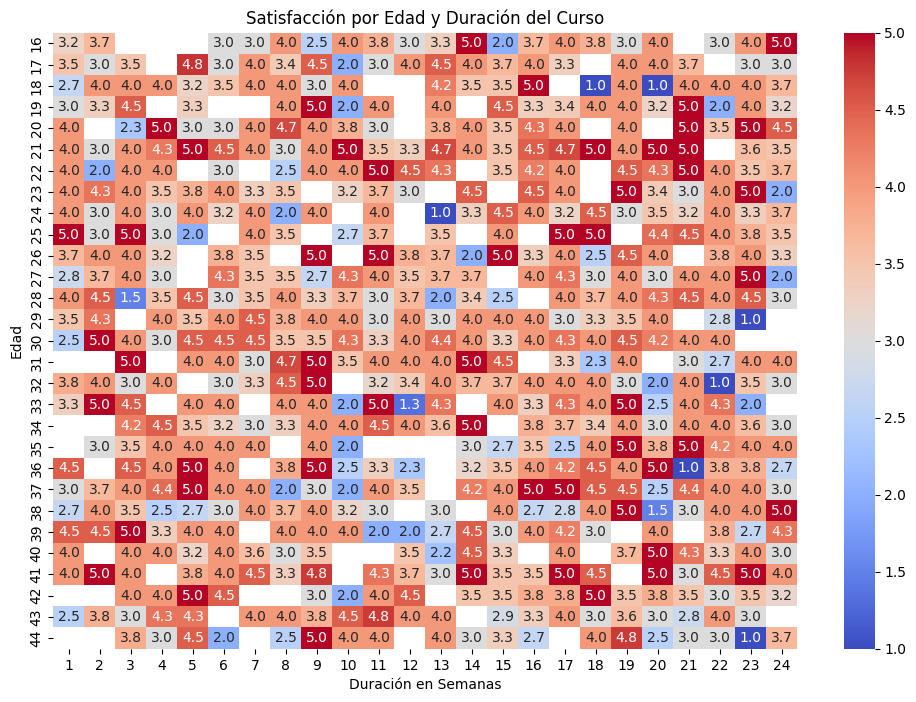

In [72]:
edad_duracion = df_sastifaccion.groupby(['edad', 'duracion_semanas'])['satisfaccion'].mean().reset_index()
pivot = edad_duracion.pivot(index='edad', columns='duracion_semanas', values='satisfaccion')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Satisfacción por Edad y Duración del Curso')
plt.xlabel('Duración en Semanas')
plt.ylabel('Edad')
plt.show()

## ¿A partir de que putuaje los estudiantes si recomiendan EF? 💁🏽

In [33]:
df_sastifaccion.groupby('satisfaccion')['recomendaria_EF'].mean().sort_values(ascending=True)

satisfaccion
1    0.0
2    0.0
3    0.0
4    1.0
5    1.0
Name: recomendaria_EF, dtype: float64

In [41]:
recomendacion_ef_4 = df_sastifaccion[df_sastifaccion['satisfaccion'] == 4]['recomendaria_EF'].sum()
recomendacion_ef_5 = df_sastifaccion[df_sastifaccion['satisfaccion'] == 5]['recomendaria_EF'].sum()
print(f"Recomendaciones EF con satisfacción = 4: {recomendacion_ef_4}")
print(f"Recomendaciones EF con satisfacción = 5: {recomendacion_ef_5}")
print(f"Porcentaje de estudiantes que recomendarían EF: {df_sastifaccion['recomendaria_EF'].mean() * 100:.2f}%")
print(f"Total de estudirantes que recomiendan EF: {recomendacion_ef_4 + recomendacion_ef_5}")

Recomendaciones EF con satisfacción = 4: 603
Recomendaciones EF con satisfacción = 5: 369
Porcentaje de estudiantes que recomendarían EF: 64.80%
Total de estudirantes que recomiendan EF: 972


## ¿Cuales son los idomas mas estudiados, con relacion a edad? 👤

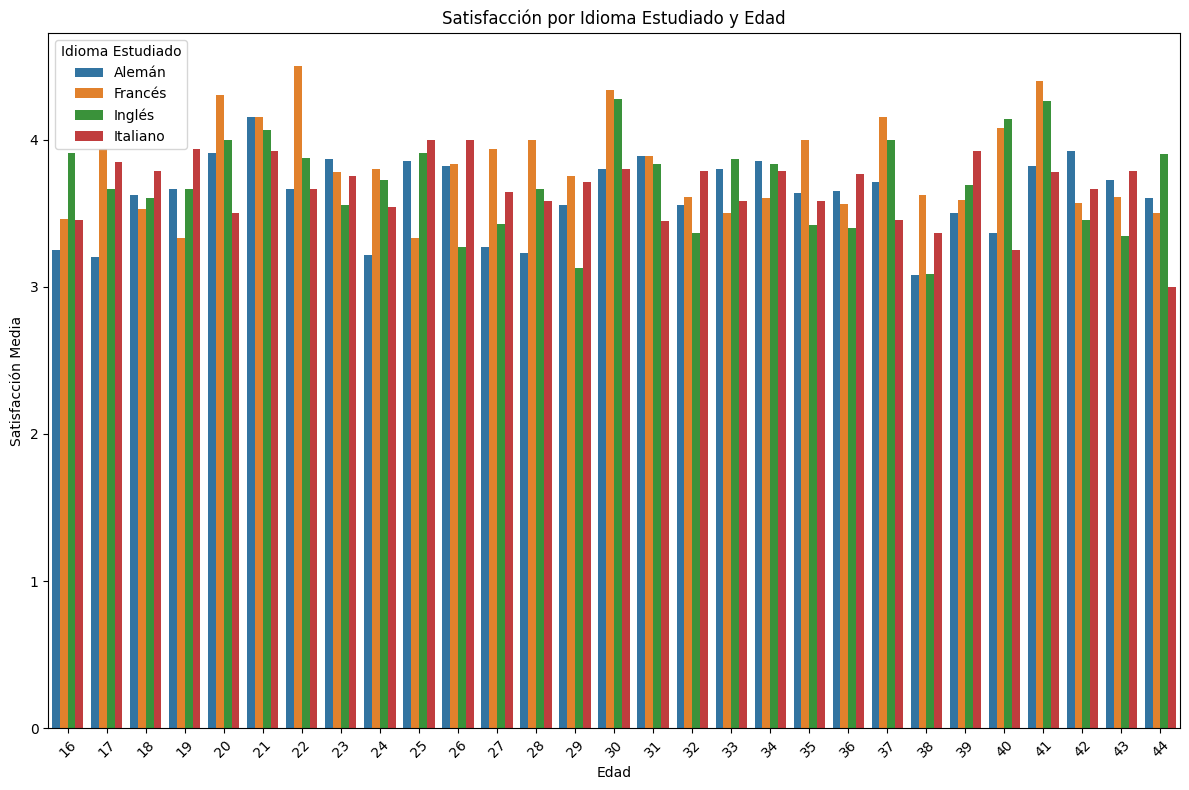

In [80]:
idiomas_estudiados_edad = df_sastifaccion.groupby(['idioma_estudiado', 'edad'])['satisfaccion'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=idiomas_estudiados_edad, x='edad', y='satisfaccion', hue='idioma_estudiado')
plt.title('Satisfacción por Idioma Estudiado y Edad')
plt.xlabel('Edad')
plt.ylabel('Satisfacción Media')
plt.legend(title='Idioma Estudiado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Sastifaccion vs tipo de alojamiento


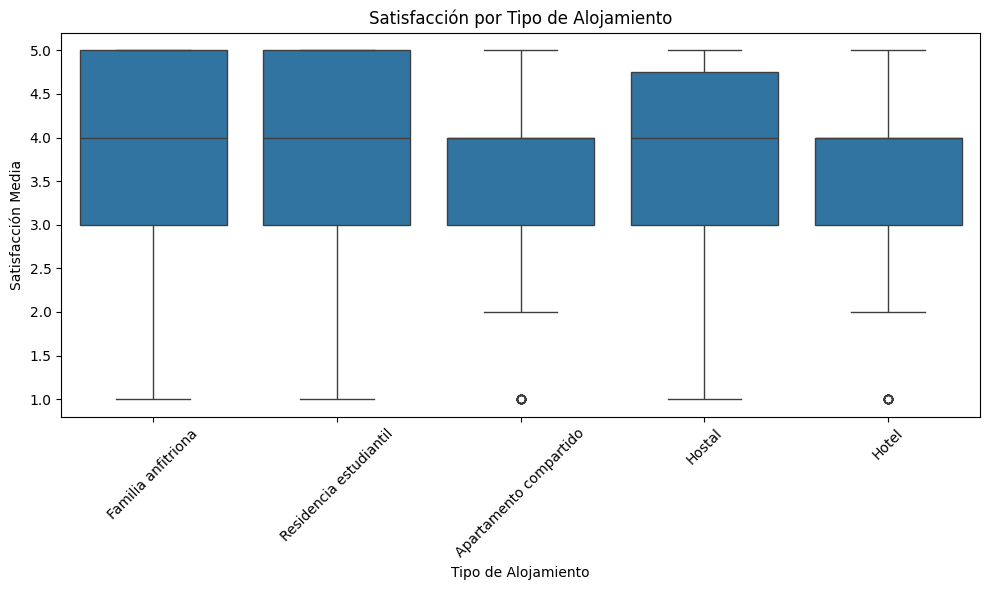

In [83]:
raking_alojamiento = df_sastifaccion.groupby('alojamiento')['satisfaccion'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sastifaccion, x='alojamiento', y='satisfaccion', order=raking_alojamiento.index)
plt.title('Satisfacción por Tipo de Alojamiento')
plt.xlabel('Tipo de Alojamiento')
plt.ylabel('Satisfacción Media')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Promedio de sastifaccion por pais destino

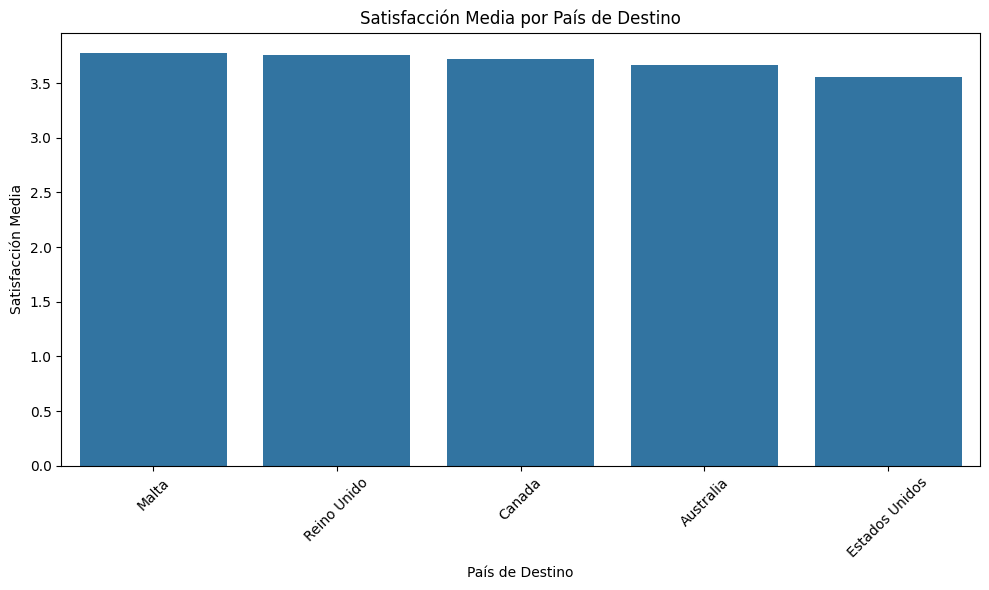

In [84]:
mean_sasti_pais = df_sastifaccion.groupby('pais_destino')['satisfaccion'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_sasti_pais.index, y=mean_sasti_pais.values)
plt.title('Satisfacción Media por País de Destino')
plt.xlabel('País de Destino')
plt.ylabel('Satisfacción Media')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlacion entre quejas, sastifaccion y recomendacion


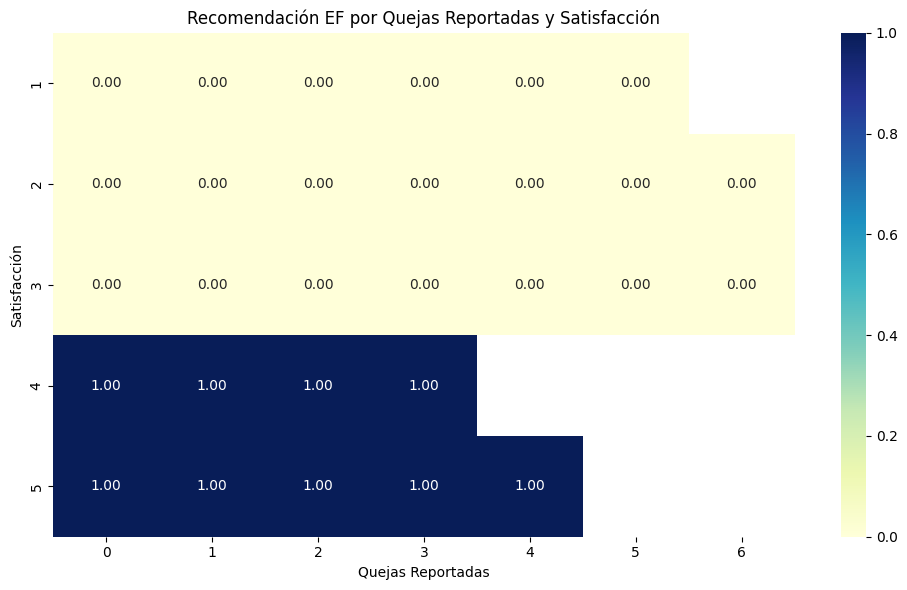

In [87]:
quejas_sas_recomendacion = df_sastifaccion.groupby(['quejas_reportadas', 'satisfaccion'])['recomendaria_EF'].mean().reset_index()
#heatmap
pivot_quejas = quejas_sas_recomendacion.pivot(index='satisfaccion', columns='quejas_reportadas', values='recomendaria_EF')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_quejas, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Recomendación EF por Quejas Reportadas y Satisfacción')
plt.xlabel('Quejas Reportadas')
plt.ylabel('Satisfacción')
plt.tight_layout()
plt.show()

## Porcentaje de estudiantes de recomendacion de EF

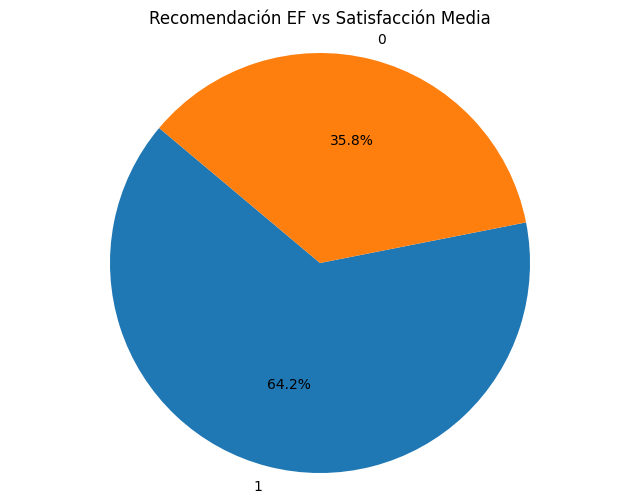

In [88]:
recome_ef = df_sastifaccion.groupby('recomendaria_EF')['satisfaccion'].mean().sort_values(ascending=False)
##GRAFICO PIE CHART
plt.figure(figsize=(8, 6))
plt.pie(recome_ef, labels=recome_ef.index, autopct='%1.1f%%', startangle=140)
plt.title('Recomendación EF vs Satisfacción Media')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## KPIs importantes 📊

📎 Resultados del Análisis

🏡 El tipo de alojamiento mejor valorado fue la familia anfitriona, posiblemente por brindar un ambiente más hogareño, mayor inmersión cultural y menor costo.
En contraste, el alojamiento en hotel fue el peor calificado, tal vez por precios más altos o lejanía de la escuela.

👉 Recomendación: establecer convenios con hoteles cercanos y mejorar la experiencia para aumentar su preferencia al menos en un 5%.

🇺🇸 Estados Unidos fue el país destino con menor calificación de satisfacción.
Se sugiere investigar más a fondo los motivos detrás de esta baja valoración, que podrían estar relacionados con el alojamiento, el costo del programa o el choque cultural.

📊 Existe una correlación clara entre edad, duración del curso y nivel de satisfacción.
Estudiantes más jóvenes y cursos de menor duración tienden a ser más exigentes, mientras que quienes toman cursos más largos reportan mayor satisfacción.

⭐ Los estudiantes que calificaron con 4 o 5 son los que más recomiendan EF.
De un total de 2,000 registros, 972 estudiantes (64.2%) recomendarían EF, frente a un 35.8% que no lo haría.

🌍 También se identificó una relación entre idioma elegido, edad del estudiante y satisfacción general.
Idiomas menos comunes como Japonés o Alemán tienen calificaciones ligeramente más altas, posiblemente por motivaciones personales más fuertes o menores expectativas culturales.